## Szybka transformata Fouriera (FFT - Fast Fourier Transform)

Zapoznaj się ze sposobem działania transformacji Fouriera i jej praktycznym zastosowaniem. 

W poniższym ćwiczeniu korzystamy z biblioteki FFT będącej częścią pakietu scipy

In [0]:
from scipy import fft

#### Przykład 
Analiza sygnału wygenerowanego funkcją okresową $sin(2 \pi t)$. Częstotliowścią sygnału określamy liczbę pełnych zmian sygnału w określonej jednostce czasu. Przyjmując przedział $t:[0..1]$ częstotliwość funkcji $f(t) = sin(2 \pi t)$ wynozi 1 Hz. Zwizualizujmy ten sygnał: 

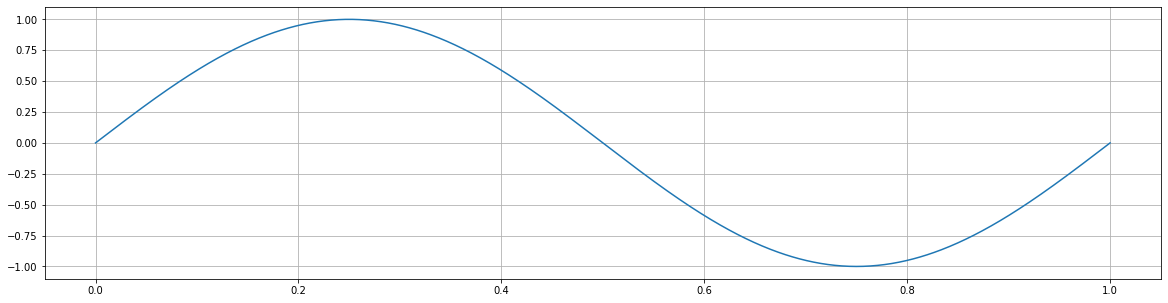

In [80]:
import numpy as np
# liczba próbek 
N = 1000
# częstotliwość 
F=1
t = np.linspace(0.0, 1.0, N)
ft = np.sin(2*np.pi*t*F)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

Manipulując parametrem F w powyższym kodzie mozemy zmieniać częstotliwość sygnału. 

Zastosujmy szybkąd transformatę Fouriera do spróbkowanego przebiegu tej funkcji. 

Wynikiem działania algorytmu jest widmo sygnału czyli reprezentacja częstotliwościowa. Na podstawie N próbek sygnału wyliczane jest N wartości zespolonego widma, jednak zazwyczaj interesuje nas moduł widma, który możemy wyznaczyć funkcją np.abs(). Element yf[0] zawiera składową średnią sygnału, yf[1:n//2] zawiera współczynniki odpowiadające dodatnim częstościom, a yf[n//2+1:]  współczynniki odpowiadające ujemnym częstościom. Dla naszych potrzeb wystarczy zwizualizować połowę tablicy yf (w tym przypadku druga część zawiera lustrzaną kopie widam z pierwszej części tablicy). 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  This is separate from the ipykernel package so we can avoid doing imports until


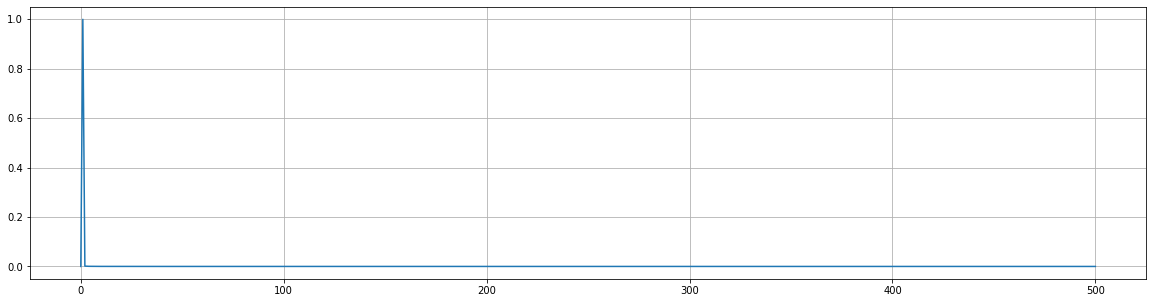

In [81]:
# odstęp próbkowanie
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 1
Wygeneruj sygnał sinusoidalny składający się z dwóch lub więcej składowych o różnych częstotliwościach. Zwizualizuj sygnał i dokonaj jego analizy z wykorzystaniem FFT. 


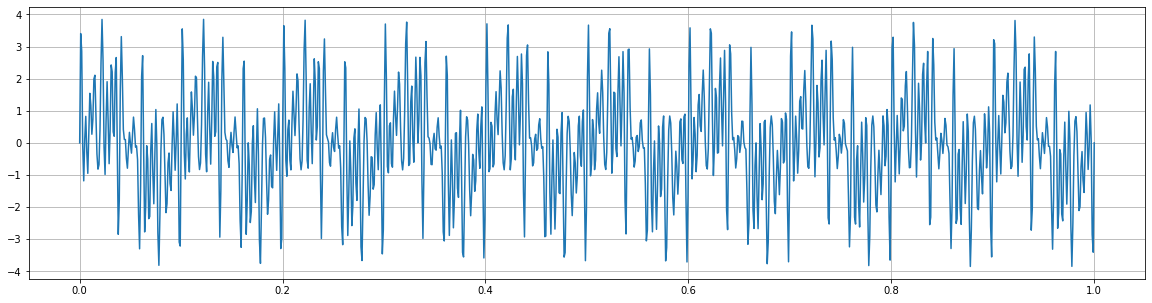

In [82]:
F = [200, 100, 10, 150, 230]
N = 1000
t = np.linspace(0.0, 1.0, N)
ft = sum([np.sin(2*np.pi*t*f) for f in F])

plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


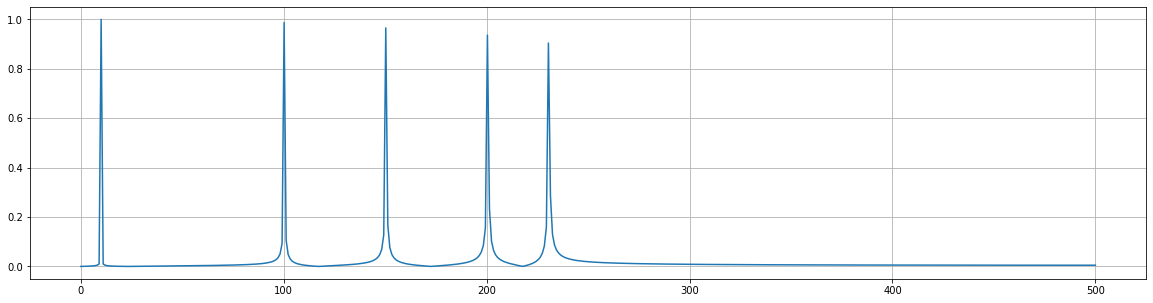

In [83]:
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

### Zadanie 2
Odszumianie sygnału. 
1. Wypełniamy tablicę wartościami funkcji sinus ("sygnał") zaburzonej niewielkim "szumem" np. dodając do każdej wartości wylosowaną liczbę funkcją rand(). 
2. Proszę narysować wykres zaszumionej funkcji. 
3. Wykonać FFT dla takiego sygnału i narysować wykres transformaty Fouriera (widmo) tego sygnału (jak poprzednio). Po transformacie wyzerowac w widmie wszystkie elementy, których wartość bezwzględna jest mniejsza niz 50. W ten sposób usuwamy "szumy" z sygnału. 
4. Przeprowadzić odwrotną transformatę funkcją ifft(). Narysować wykres otrzymanej funkcji dla częsci rzeczywistej. Porównać z wejściowym wykresem sygnału. 





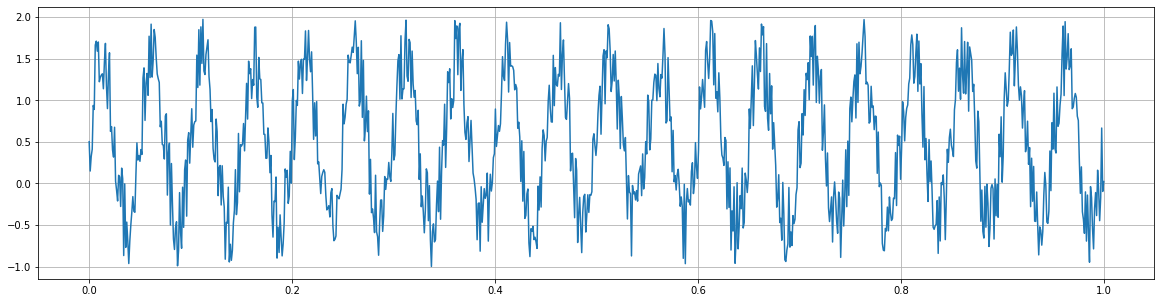

In [84]:
from random import random
F=20
t = np.linspace(0.0, 1.0, N)
ft = [np.sin(2*np.pi*tt*F) + random() for tt in t]

plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(t,ft)
plt.grid()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


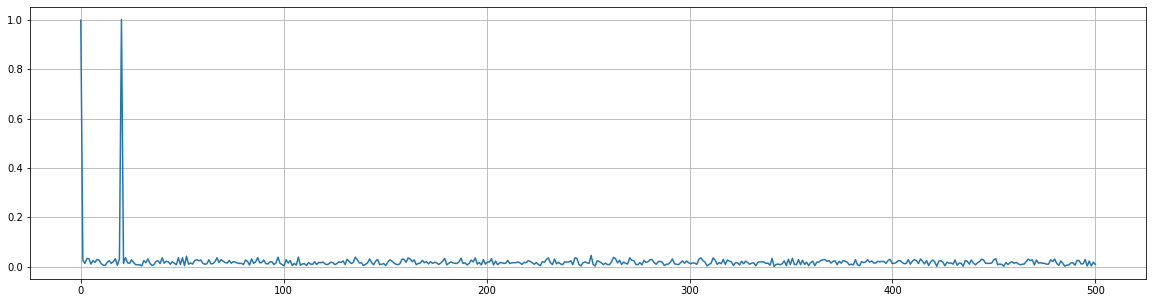

In [85]:
T = 1.0 / N
yf = fft(ft)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yn = np.abs(yf[0:N//2])
plt.plot(xf, 2.0/N * yn)
plt.grid()
plt.show()

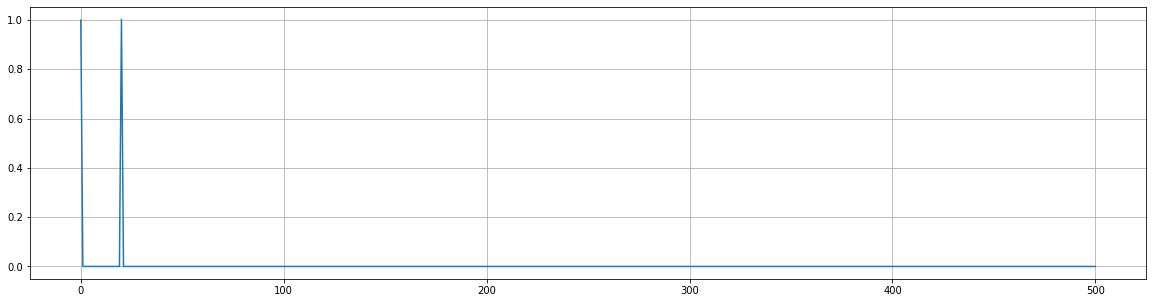

In [86]:
for i in range(len(yn)):
    if abs(yn[i]) < 50: 
        yn[i] = 0

plt.plot(xf, 2.0/N * yn)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


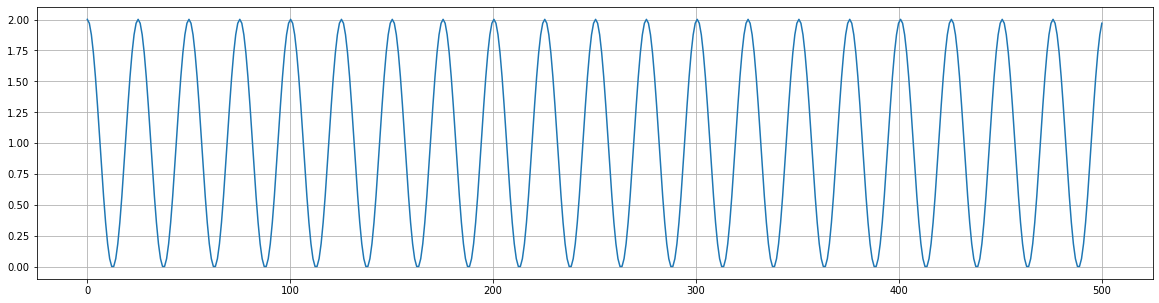

In [87]:
ifft = fft.ifft(yn)
plt.plot(xf, ifft)
plt.grid()
plt.show()

### Zadanie 3 
Proszę nagrać własny glos lub jakikolwiek inny dźwięk i przenalizowac go przy pomocy FFT (jak powyżej).
Następnie poeksperymentować (wyciąć wybrane częstotliwości), dokonać odwrotnej transformaty i odsłuchać efekt. 

Z racji tego że w tym zadaniu trzeba obsłużyć zewnętrzne pliki dźwiękowe to wykonałem je po za notebookiem.

Poniżej zamieszczam skrypty których użyłem do generowania wykresów i manipulacji plikami. Wykresy i wyniki zamieściłem w pliku pdf

In [0]:
# Odczytanie pliku i wygnerowanie wykresu z oryginalnym nagraniem
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

rate, data = wavfile.read('Nagranie.wav')
scaled_data = data / (2.**15)
time = np.arange(0, len(data), 1) / rate
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(time, scaled_data)
plt.grid()
plt.savefig('Nagranie.png')

In [0]:
# fft
N = len(data)
T = 1.0 / N
yf = fft.fft(scaled_data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(xf, np.abs(yf[0:N//2]))
plt.grid()
plt.savefig('Nagranie.png')

In [0]:
# Wycięcie niektórych częstotliwości
N = len(data)
T = 1.0 / N
yf = fft.fft(scaled_data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

for i in range(len(xf)):
    if 44000 < xf[i] < 50000:
        yf[i] = 0
    if 55000 < xf[i] < 70000:
        yf[i] = 0
    if 0 < xf[i] < 18000:
        yf[i] = 0
    if 18500 < xf[i] < 24000:
        yf[i] = 0

plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(xf, np.abs(yf[0:N//2]))
plt.grid()
plt.savefig('Nagranie.png')

In [0]:
# Zapisanie pliku i wygenerowanie wykresu dla nowego pliku
N = len(data)
T = 1.0 / N
yf = fft.fft(scaled_data)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

for i in range(len(xf)):
    if 44000 < xf[i] < 50000:
        yf[i] = 0
    if 55000 < xf[i] < 70000:
        yf[i] = 0
    if 0 < xf[i] < 18000:
        yf[i] = 0
    if 18500 < xf[i] < 24000:
        yf[i] = 0

yn = np.real(fft.ifft(yf))
wavfile.write("new_file.wav", len(yn), yn)
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(time, yn)
plt.grid()
plt.savefig('Nagranie.png')


Nowe nagranie jest zmodulowane - czuć że pewne częstoliwości są wycięte.